## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 25
BATCH_SIZE = 256
MOMENTUM = 0.9
NUM_NEURONS = [[512, 256, 128], [512, 128]]
DROPOUT_RATE = [0, 0.2, 0.4]

In [13]:
import itertools
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for num_neurons, dropout_rate in itertools.product(NUM_NEURONS, DROPOUT_RATE):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with num_neurons = %s, dropout_rate = %s" % (str(num_neurons), str(dropout_rate)))
          
    model = build_mlp(input_shape=x_train.shape[1:], num_neurons=num_neurons, drp_ratio=dropout_rate)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
          
    exp_name_tag = "%s-%s" % (str(num_neurons), str(dropout_rate))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with num_neurons = [512, 256, 128], dropout_rate = 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (D

50000/50000 [==============================] - 9s 188us/step - loss: 1.5736 - acc: 0.4352 - val_loss: 1.5022 - val_acc: 0.4663
Epoch 14/25
50000/50000 [==============================] - 9s 185us/step - loss: 1.5582 - acc: 0.4401 - val_loss: 1.5298 - val_acc: 0.4548
Epoch 15/25
50000/50000 [==============================] - 9s 183us/step - loss: 1.5581 - acc: 0.4389 - val_loss: 1.4806 - val_acc: 0.4714
Epoch 16/25
50000/50000 [==============================] - 9s 184us/step - loss: 1.5378 - acc: 0.4472 - val_loss: 1.4969 - val_acc: 0.4686
Epoch 17/25
50000/50000 [==============================] - 9s 189us/step - loss: 1.5387 - acc: 0.4473 - val_loss: 1.5104 - val_acc: 0.4639
Epoch 18/25
50000/50000 [==============================] - 9s 184us/step - loss: 1.5271 - acc: 0.4501 - val_loss: 1.4601 - val_acc: 0.4845
Epoch 19/25
50000/50000 [==============================] - 9s 187us/step - loss: 1.5137 - acc: 0.4542 - val_loss: 1.4784 - val_acc: 0.4727
Epoch 20/25
50000/50000 [==============

50000/50000 [==============================] - 8s 170us/step - loss: 1.7298 - acc: 0.3867 - val_loss: 1.7355 - val_acc: 0.3909
Epoch 3/25
50000/50000 [==============================] - 8s 169us/step - loss: 1.6421 - acc: 0.4193 - val_loss: 1.6360 - val_acc: 0.4196
Epoch 4/25
50000/50000 [==============================] - 8s 169us/step - loss: 1.5956 - acc: 0.4339 - val_loss: 1.5830 - val_acc: 0.4402
Epoch 5/25
50000/50000 [==============================] - 8s 169us/step - loss: 1.5385 - acc: 0.4545 - val_loss: 1.5293 - val_acc: 0.4520
Epoch 6/25
50000/50000 [==============================] - 9s 170us/step - loss: 1.5092 - acc: 0.4607 - val_loss: 1.5523 - val_acc: 0.4461
Epoch 7/25
50000/50000 [==============================] - 9s 173us/step - loss: 1.4788 - acc: 0.4740 - val_loss: 1.5584 - val_acc: 0.4432
Epoch 8/25
50000/50000 [==============================] - 9s 172us/step - loss: 1.4475 - acc: 0.4878 - val_loss: 1.4670 - val_acc: 0.4718
Epoch 9/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 10s 193us/step - loss: 2.1048 - acc: 0.2193 - val_loss: 1.9054 - val_acc: 0.3249
Epoch 2/25
50000/50000 [==============================] - 9s 179us/step - loss: 1.9550 - acc: 0.2826 - val_loss: 1.8366 - val_acc: 0.3458
Epoch 3/25
50000/50000 [==============================] - 9s 180us/step - loss: 1.9073 - acc: 0.3045 - val_loss: 1.8144 - val_acc: 0.3642
Epoch 4/25
50000/50000 [==============================] - 9s 180us/step - loss: 1.8749 - acc: 0.3183 - val_loss: 1.7577 - val_acc: 0.3853
Epoch 5/25
50000/50000 [==============================] - 9s 183us/step - loss: 1.8467 - acc: 0.3310 - val_loss: 1.7357 - val_acc: 0.3930
Epoch 6/25
50000/50000 [==============================] - 9s 182us/step - loss: 1.8263 - acc: 0.3353 - val_loss: 1.7317 - val_acc: 0.3884
Epoch 7/25
50000/50000 [==============================] - 9s 183us/step - loss: 1.8101 - acc: 0.3403 - val_loss: 1.7280 -

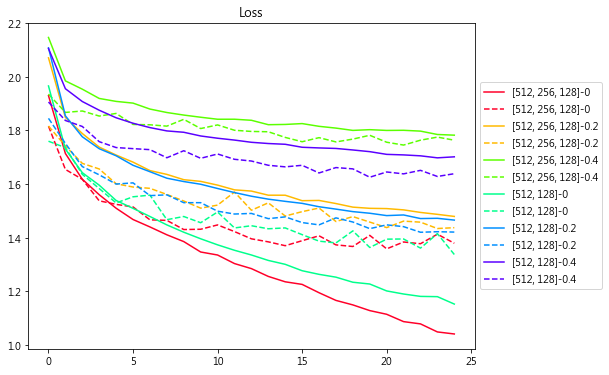

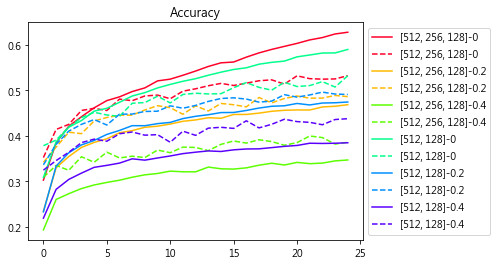

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()